In [ ]:
import pandas as pd

In [ ]:
#loading the dataset
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
# Display the first five rows of each dataset
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [ ]:
# Display the last five rows of each dataset
print("Customers Data:")
print(customers.tail())

print("\nProducts Data:")
print(products.tail())

print("\nTransactions Data:")
print(transactions.tail())

Customers Data:
    CustomerID      CustomerName  Region  SignupDate
195      C0196       Laura Watts  Europe  2022-06-07
196      C0197  Christina Harvey  Europe  2023-03-21
197      C0198       Rebecca Ray  Europe  2022-02-27
198      C0199    Andrea Jenkins  Europe  2022-12-03
199      C0200       Kelly Cross    Asia  2023-06-11

Products Data:
   ProductID             ProductName     Category   Price
95      P096    SoundWave Headphones  Electronics  307.47
96      P097      BookWorld Cookbook        Books  319.34
97      P098        SoundWave Laptop  Electronics  299.93
98      P099  SoundWave Mystery Book        Books  354.29
99      P100       HomeSense Sweater     Clothing  126.34

Transactions Data:
    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32    

In [ ]:
# Display the information of each dataset
print("Customers Data:")
print(customers.info())

print("\nProducts Data:")
print(products.info())

print("\nTransactions Data:")
print(transactions.info())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null

In [ ]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
# Check for missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
# Summary statistics for each dataset
print("\nSummary Statistics - Customers:")
print(customers.describe(include='all'))

print("\nSummary Statistics - Products:")
print(products.describe(include='all'))

print("\nSummary Statistics - Transactions:")
print(transactions.describe(include='all'))


Summary Statistics - Customers:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Summary Statistics - Products:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100     

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

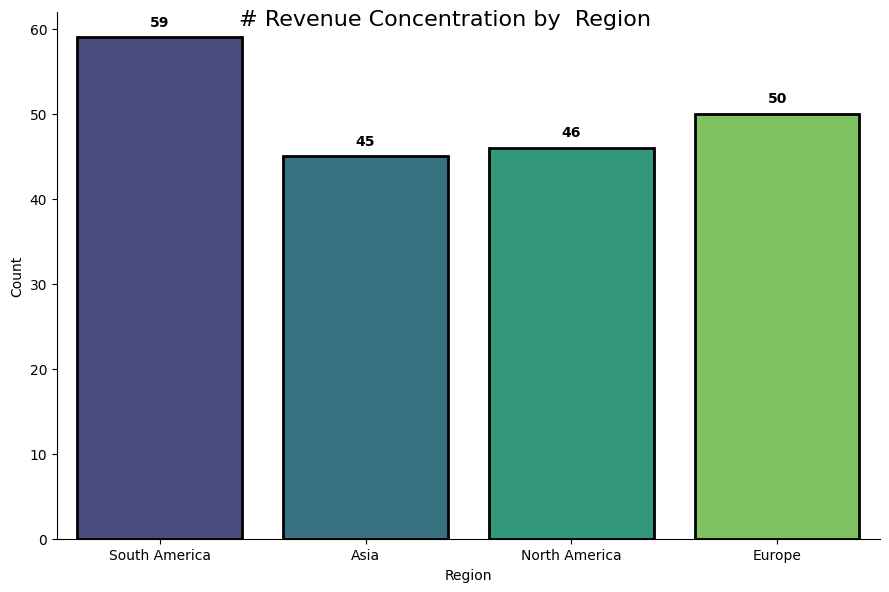

In [ ]:
# Revenue Concentration by Region
categorical_columns = ['Region']  # List the categorical columns you want to check

for column in categorical_columns:
    # Create the categorical plot using catplot
    g = sns.catplot(data=customers, x=column, kind='count', hue=column, palette='viridis', height=6, aspect=1.5)

    # Adding titles and labels
    g.set_axis_labels(column, 'Count')
    g.fig.suptitle(f'# Revenue Concentration by  {column}', fontsize=16)

    # Adding count text above the bars
    for ax in g.axes.flat:
        for p in ax.patches:
            height = p.get_height()  # Get the height (count) of the bar
            ax.text(p.get_x() + p.get_width() / 2., height + 1,  # Adding text slightly above the bar
                    int(height), ha='center', va='bottom', fontweight='bold', color='black')

            # Adding a border around the bars
            p.set_edgecolor('black')  # Set the border color
            p.set_linewidth(2)  # Set the border width

    plt.show()


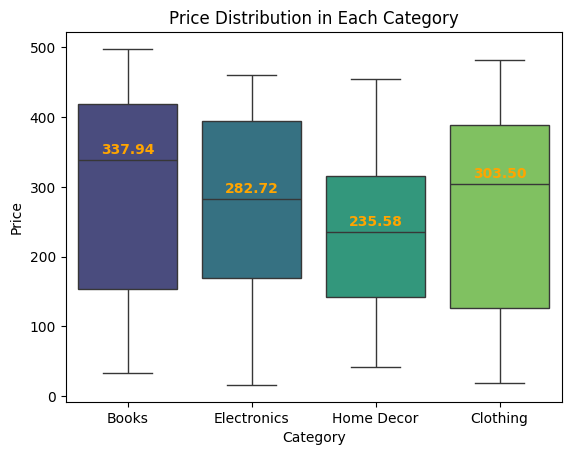

In [ ]:
# Plot price distribution for each category using a boxplot
ax = sns.boxplot(data=products, x='Category', y='Price', hue='Category', palette='viridis')
# Set the title
plt.title('Price Distribution in Each Category')

# Add values (like median or quartiles) on top of each boxplot
for i in range(len(ax.patches)):
    # Getting the median value
    median = ax.lines[i*6 + 4].get_ydata()[0]  # Accessing the median line (index 4)

    # Adding the median value text on the boxplot
    ax.text(i, median + 5, f'{median:.2f}', ha='center', va='bottom', fontweight='bold', color='orange')

# Show the plot
plt.show()







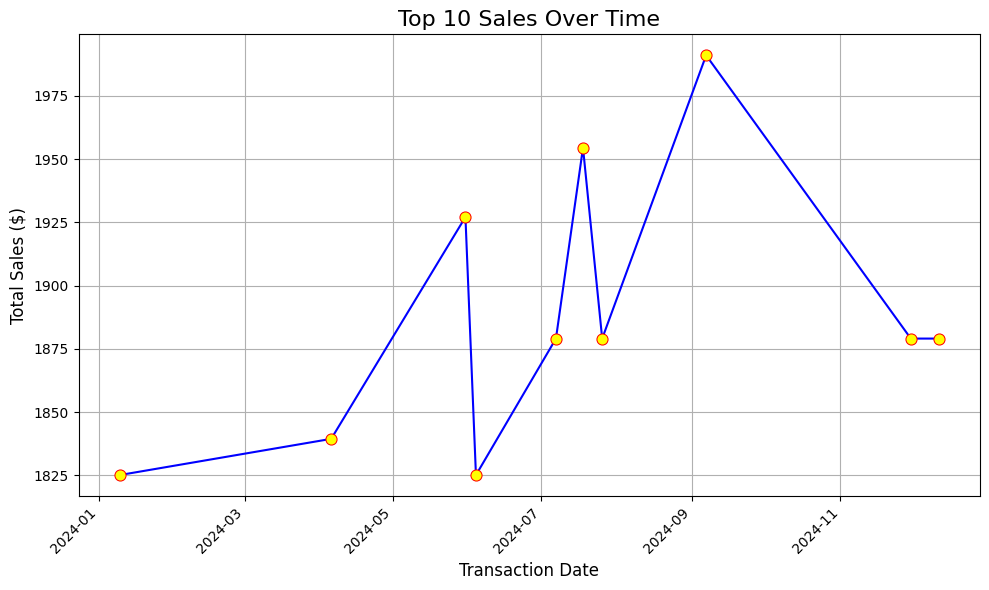

In [ ]:
# Top 10  sales over time
sales_over_time = transactions.groupby('TransactionDate')['TotalValue'].sum().reset_index()
# Sort by TotalValue in descending order and select the top 10
top_10_sales = sales_over_time.sort_values(by='TotalValue', ascending=False).head(10)
# Create the plot
plt.figure(figsize=(10, 6))
# Plot the top 10 sales over time with a lineplot
sns.lineplot(data=top_10_sales, x='TransactionDate', y='TotalValue',
             marker='o', color='blue', markersize=8,
             markeredgecolor='red', markerfacecolor='yellow')
# Adding a title and labels
plt.title('Top 10 Sales Over Time', fontsize=16)
plt.xlabel('Transaction Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
# Formatting the x-axis to make dates more readable
plt.xticks(rotation=45, ha='right')
# Adding gridlines for better readability
plt.grid(True)
# Show the plot
plt.tight_layout()  # To ensure everything fits well, especially for rotated labels
plt.show()


In [ ]:
#Top spenders
# Aggregate TotalValue for each customer
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Sort customers by TotalValue in descending order and take the top 10
top_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)

# Merge with the customers dataframe to get CustomerName
top_customers = top_customers.merge(customers, on='CustomerID', how='left')

# Display CustomerName along with TotalValue
print(top_customers[['CustomerID', 'CustomerName', 'TotalValue']])


  CustomerID          CustomerName  TotalValue
0      C0141          Paul Parsons    10673.87
1      C0054          Bruce Rhodes     8040.39
2      C0065          Gerald Hines     7663.70
3      C0156         William Adams     7634.45
4      C0082          Aimee Taylor     7572.91
5      C0188             Anna Ball     7111.32
6      C0059  Mrs. Kimberly Wright     7073.28
7      C0028         Jennifer Pena     6819.57
8      C0099          Rodney Eaton     6715.72
9      C0165         Juan Mcdaniel     6708.10


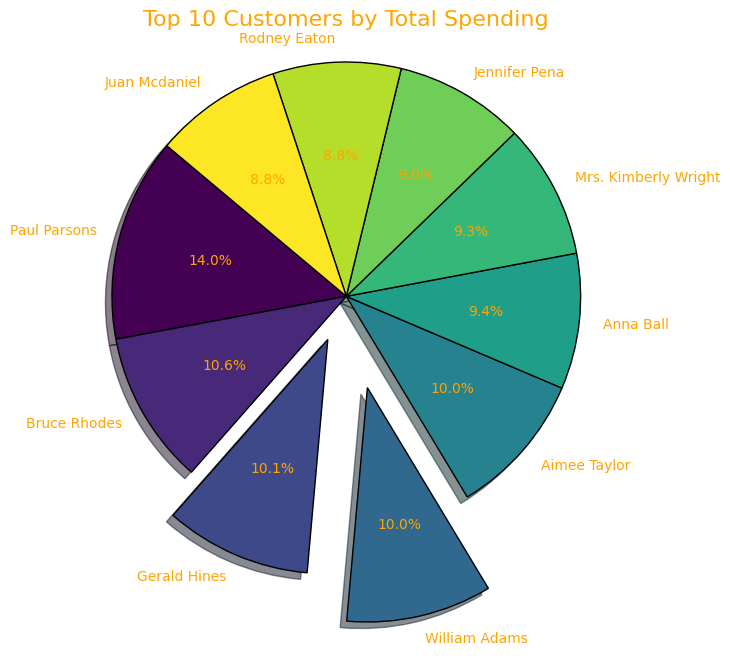

In [ ]:
import numpy as np


# Top Spenders
top_customers_sorted = top_customers.sort_values(by='TotalValue', ascending=False).head(10)

# Create the pie chart
plt.figure(figsize=(8, 8))

# Exploding specific slices (0.2 and 0.4) for emphasis
explode = [0, 0, 0.2, 0.4, 0, 0, 0, 0, 0, 0]  # Modify this as needed to emphasize certain slices

plt.pie(top_customers_sorted['TotalValue'],
        labels=top_customers_sorted['CustomerName'],
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'black'},
        explode=explode,  # Apply explosion to specific slices
        shadow=True,  # Add shadow to the pie chart
        colors=plt.cm.viridis(np.linspace(0, 1, len(top_customers_sorted))),  # Gradient color from highest to lowest
        textprops={'color': 'orange'})  # Set font color of labels to orange

# Title
plt.title('Top 10 Customers by Total Spending', fontsize=16, color='orange')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


In [ ]:
# Popular Products
top_products = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)
top_products = top_products.merge(products, on='ProductID')
print(top_products[['ProductID', 'ProductName', 'Quantity']])



  ProductID            ProductName  Quantity
0      P059        SoundWave Jeans        46
1      P054     SoundWave Cookbook        46
2      P029     TechPro Headphones        45
3      P079         ActiveWear Rug        43
4      P061    HomeSense Desk Lamp        43
5      P057  ActiveWear Smartphone        43
6      P048       TechPro Cookbook        43
7      P062        HomeSense Novel        39
8      P020      ActiveWear Jacket        38
9      P028    HomeSense Desk Lamp        38


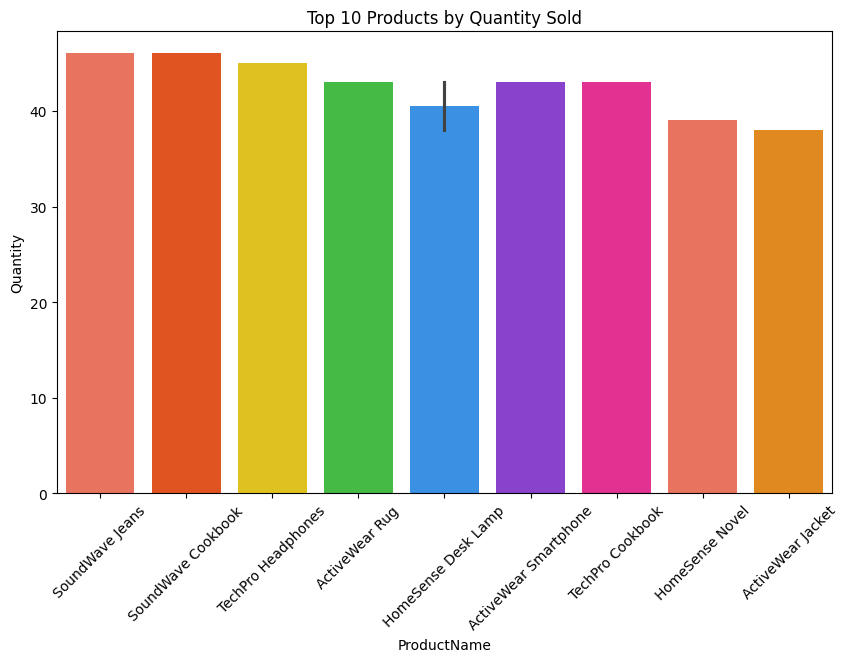

In [ ]:
#Popular Products
# Top 10 Products by Quantity Sold (assuming 'top_products' DataFrame is already loaded)
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 Products by Quantity Sold (assuming 'top_products' DataFrame is already loaded)
plt.figure(figsize=(10, 6))

# Create the bar plot with the 'hue' argument assigned to 'ProductName'
sns.barplot(data=top_products, x='ProductName', y='Quantity', hue='ProductName', palette=colors)

# Rotate x-axis labels and show the plot
plt.xticks(rotation=45)
plt.title('Top 10 Products by Quantity Sold')
plt.show()



In [ ]:
# Monthly Sales Trend
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales = monthly_sales.sort_values(by='TotalValue', ascending=False).head(10)
print(monthly_sales[['Month','TotalValue']])


      Month  TotalValue
7   2024-07    71366.39
9   2024-09    70603.75
1   2024-01    66376.39
5   2024-05    64527.74
8   2024-08    63436.74
12  2024-12    59049.20
4   2024-04    57519.06
2   2024-02    51459.27
6   2024-06    48771.18
3   2024-03    47828.73


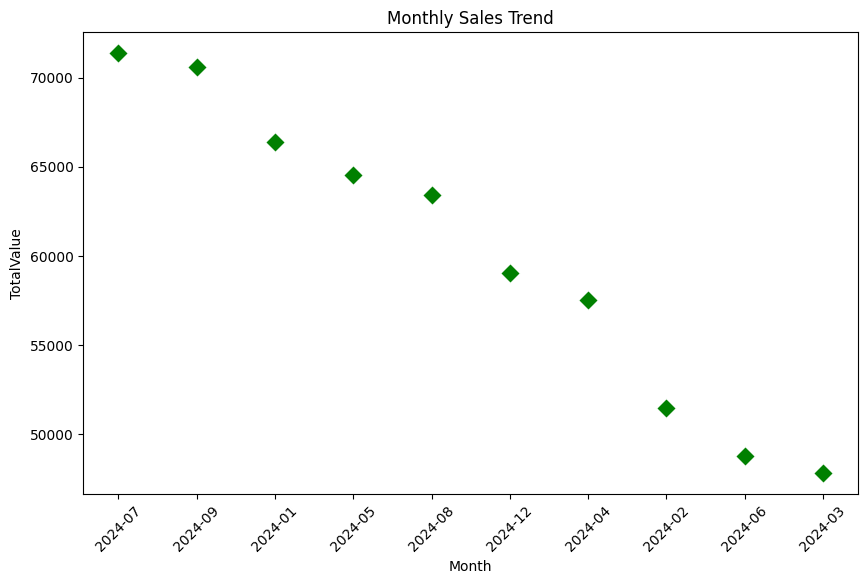

In [ ]:
# Monthly Sales Trend
plt.figure(figsize=(10, 6))
# Create the scatter plot for monthly sales with a custom marker and color
sns.scatterplot(data=monthly_sales, x='Month', y='TotalValue', color='green', s=100, marker='D')  # 'D' is a diamond marker
# Rotate x-axis labels for readability
plt.xticks(rotation=45)
# Set the title
plt.title('Monthly Sales Trend')
# Show the plot
plt.show()